In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.target.shape

(1797,)

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape 

(1797, 8, 8)

0


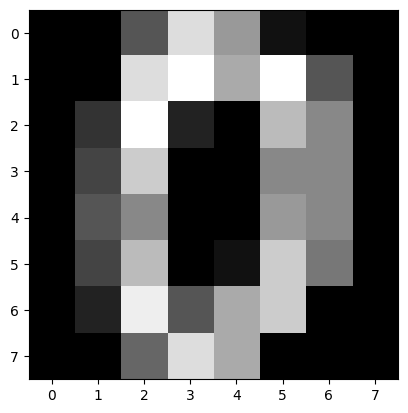

In [6]:
x = digits.images[0]
print(digits.target[0])
plt.gray()
plt.imshow(x)
plt.show()

2


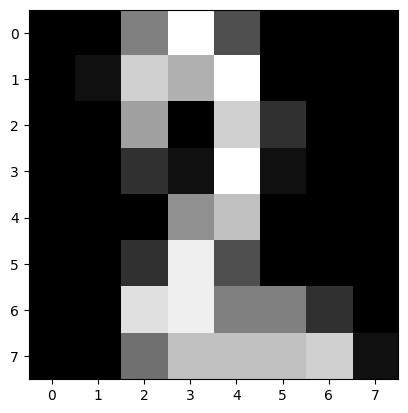

In [7]:
x = digits.images[22]
print(digits.target[22])
plt.gray()
plt.imshow(x)
plt.show()

5


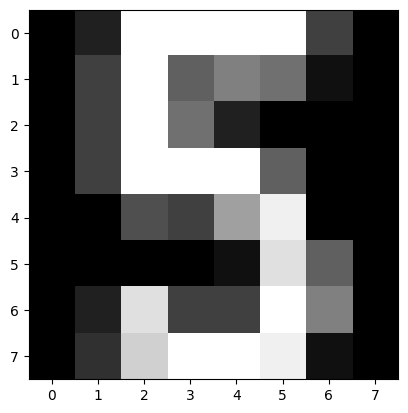

In [8]:
x = digits.images[1021]
print(digits.target[1021])
plt.gray()
plt.imshow(x)
plt.show()

## Preprocessing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30, random_state=24)

In [10]:
X_train[0]

array([ 0.,  0., 13., 16., 16., 15.,  2.,  0.,  0.,  0., 14., 13., 11.,
       16.,  2.,  0.,  0.,  0., 11., 13., 15.,  6.,  0.,  0.,  0.,  0.,
        5., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 14., 15.,  0.,  0.,
        0.,  0.,  1., 14.,  3., 15.,  7.,  0.,  0.,  0.,  6., 11.,  0.,
       15.,  6.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.,  0.])

In [11]:
scale = MinMaxScaler(feature_range=(0,1))
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [12]:
X_train[0]

array([0.        , 0.        , 0.8125    , 1.        , 1.        ,
       0.9375    , 0.125     , 0.        , 0.        , 0.        ,
       0.875     , 0.8125    , 0.6875    , 1.        , 0.125     ,
       0.        , 0.        , 0.        , 0.6875    , 0.8125    ,
       0.9375    , 0.375     , 0.        , 0.        , 0.        ,
       0.        , 0.3125    , 1.        , 0.625     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.625     ,
       0.875     , 0.9375    , 0.        , 0.        , 0.        ,
       0.        , 0.0625    , 0.875     , 0.1875    , 0.9375    ,
       0.4375    , 0.        , 0.        , 0.        , 0.375     ,
       0.6875    , 0.        , 0.9375    , 0.375     , 0.        ,
       0.        , 0.        , 0.11111111, 0.8125    , 1.        ,
       0.9375    , 0.1875    , 0.        , 0.        ])

### Metrics

In [13]:
def calc_metrics(y_train, y_train_pred, y_test, y_test_pred):
    acc_train = accuracy_score(y_true=y_train,y_pred= y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

   
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    
   
    precision_test = precision_score(y_test, y_test_pred, average='weighted')

    print("Train Accuracy: ","{:.2f}".format(acc_train), "\n"
          "Test Accuracy: ", "{:.2f}".format(acc_test),  "\n"
         
          "Test Recall: ", "{:.2f}".format(recall_test ) ,"\n"
         
          "Test Precision: ", "{:.2f}".format(precision_test),  "\n")
    

    return acc_train, acc_test, recall_test, precision_test


## Classification

### 1. Random Forest

In [14]:
rf_model = RandomForestClassifier(max_depth=128, n_estimators=228)

In [15]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=128, n_estimators=228)

In [16]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [17]:
rf_acc_train, rf_acc_test, rf_recall_test, rf_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  1.00 
Test Accuracy:  0.97 
Test Recall:  0.97 
Test Precision:  0.97 



### 2. SVM

In [18]:
svm_model = SVC(kernel='linear')

In [19]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [21]:
svm_acc_train, svm_acc_test, svm_recall_test, svm_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  1.00 
Test Accuracy:  0.98 
Test Recall:  0.98 
Test Precision:  0.98 



### 3. ANN

In [22]:
ann_model = MLPClassifier(hidden_layer_sizes=128, activation='relu', solver='adam', batch_size= 60)

In [23]:
ann_model.fit(X_train, y_train)

MLPClassifier(batch_size=60, hidden_layer_sizes=128)

In [24]:
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)

In [25]:
ann_acc_train, ann_acc_test, ann_recall_test, ann_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  1.00 
Test Accuracy:  0.98 
Test Recall:  0.98 
Test Precision:  0.98 



### 4. KNN

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [28]:
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [29]:
knn_acc_train, knn_acc_test, knn_recall_test, knn_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.99 
Test Accuracy:  0.99 
Test Recall:  0.99 
Test Precision:  0.99 



## Comparison

In [30]:
acc_train = [rf_acc_train, svm_acc_train, ann_acc_train, knn_acc_train]
acc_test = [rf_acc_test, svm_acc_test, ann_acc_test, knn_acc_test]
recall_test = [rf_recall_test, svm_recall_test, ann_recall_test, knn_recall_test]
precision_test = [rf_precision_test, svm_precision_test, ann_precision_test, knn_precision_test]
title = ["Random Forest", "SVM", "ANN", "KNN"]
colors = ["red", "green", "blue", "orange"]

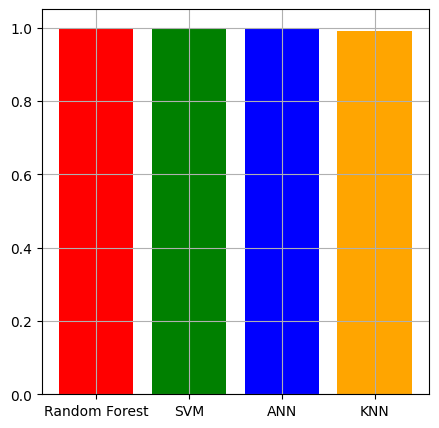

In [31]:
plt.figure(figsize=(5,5))
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

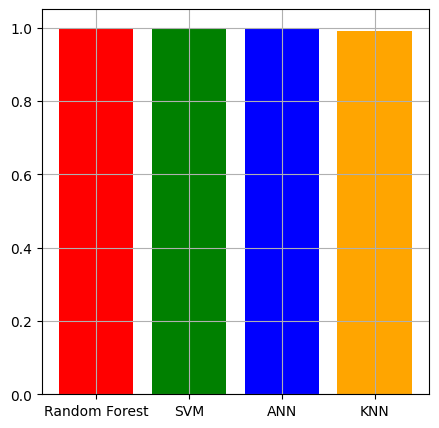

In [32]:
plt.figure(figsize=(5,5))
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

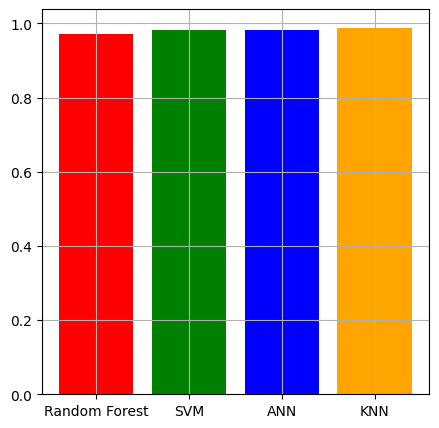

In [33]:
plt.figure(figsize=(5,5))
plt.bar(title, recall_test, color = colors)
plt.grid()
plt.show()

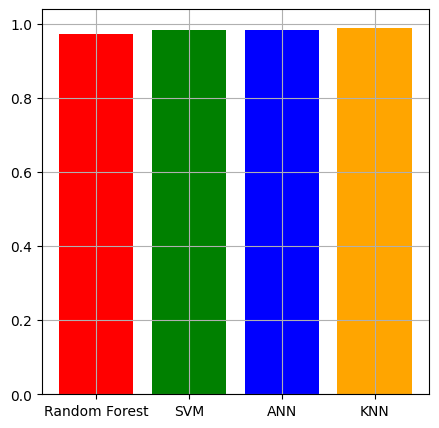

In [34]:
plt.figure(figsize=(5,5))
plt.bar(title, precision_test, color = colors)
plt.grid()
plt.show()

## PCA

In [35]:
pca = PCA(n_components=32)

In [36]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [37]:
X_train.shape, X_test.shape

((1257, 32), (540, 32))

### 1. Random Forest

In [38]:
rf_model = RandomForestClassifier(max_depth=128, n_estimators=228)

In [39]:
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
rf_acc_train, rf_acc_test, rf_recall_test, rf_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  1.00 
Test Accuracy:  0.97 
Test Recall:  0.97 
Test Precision:  0.97 



### 2. SVM

In [40]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
svm_acc_train, svm_acc_test, svm_recall_test, svm_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  1.00 
Test Accuracy:  0.98 
Test Recall:  0.98 
Test Precision:  0.98 



### 3. ANN

In [41]:
ann_model = MLPClassifier(hidden_layer_sizes=128, activation='relu', solver='adam', batch_size= 60)
ann_model.fit(X_train, y_train)
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)
ann_acc_train, ann_acc_test, ann_recall_test, ann_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)


Train Accuracy:  1.00 
Test Accuracy:  0.98 
Test Recall:  0.98 
Test Precision:  0.98 



### 4. KNN

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
knn_acc_train, knn_acc_test, knn_recall_test, knn_precision_test = calc_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Accuracy:  0.99 
Test Accuracy:  0.99 
Test Recall:  0.99 
Test Precision:  0.99 



The end!